# Analítica computacional para la toma de decisiones
## Proyecto 1
## Tarea 2 - Limpieza y alistamiento de datos

### Importar librerías

In [172]:
import pandas as pd
import numpy as np

### Importar dataset

In [173]:
df = pd.read_csv('bank-full.csv', delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### reemplazar los valores de Unknown por N/A 

In [174]:
df = df.dropna()  # Elimina filas con valores vacíos (NaN)

In [175]:
# Verificar que no haya vacíos en las columnas del dataset, se imprime False si es así y True de lo contrario
for i in df.columns:
    print(i + " " + str(df[i].isin([None]).any()))

age False
job False
marital False
education False
default False
balance False
housing False
loan False
contact False
day False
month False
duration False
campaign False
pdays False
previous False
poutcome False
y False


### Transformar el valor -1 en la columna 'pdays' a 'No contactado'

In [176]:
df['pdays'] = df['pdays'].replace(-1, 0)
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

### Verificar si hay duplicados

In [177]:
# Número de datos duplicados
duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')
df.shape

Number of Duplicate Entries: 0


(45211, 17)

### Codificar las columnas binarias (Categoricas)

In [178]:
binary_columns = ['default', 'housing', 'loan', 'y']
df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 'yes' else 0)
print(df)

       age           job   marital  education  default  balance  housing  \
0       58    management   married   tertiary        0     2143        1   
1       44    technician    single  secondary        0       29        1   
2       33  entrepreneur   married  secondary        0        2        1   
3       47   blue-collar   married    unknown        0     1506        1   
4       33       unknown    single    unknown        0        1        0   
...    ...           ...       ...        ...      ...      ...      ...   
45206   51    technician   married   tertiary        0      825        0   
45207   71       retired  divorced    primary        0     1729        0   
45208   72       retired   married  secondary        0     5715        0   
45209   57   blue-collar   married  secondary        0      668        0   
45210   37  entrepreneur   married  secondary        0     2971        0   

       loan    contact  day month  duration  campaign  pdays  previous  \
0         0  

C:\Users\Juan David Auza\AppData\Local\Temp\ipykernel_11260\4259214325.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 'yes' else 0)


In [179]:
import pandas as pd

# Crear la columna binaria inicializada en 0
df["marital (bin)"] = 0

# Asignar 1 a las filas donde 'poutcome' es 'success'
df.loc[df["marital"] == "married", "marital (bin)"] = 1

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital (bin)
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0,0,unknown,0,1
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0,0,unknown,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0,0,unknown,0,1
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0,0,unknown,0,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0,0,unknown,0,0


In [180]:
contact_column = ['contact']
df[contact_column] = df[contact_column].applymap(lambda x: 1 if x == 'telephone' else 0)

C:\Users\Juan David Auza\AppData\Local\Temp\ipykernel_11260\3565361449.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[contact_column] = df[contact_column].applymap(lambda x: 1 if x == 'telephone' else 0)


In [181]:
df = df[df['month'].notna()]

In [182]:
# Diccionario de mapeo de meses a números
month_map = {
    'ene': 1, 'feb': 2, 'mar': 3, 'abr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'ago': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dic': 12
}

# Reemplazar los nombres de los meses con sus valores numéricos
df['month'] = df['month'].map(month_map)

In [183]:
# Crear un diccionario de mapeo único para cada trabajo
job_map = {job: idx for idx, job in enumerate(df["job"].unique(), start=1)}

# Mostrar el mapeo de cada trabajo con su número asignado
print("Asignación de números para cada trabajo:")
for job, num in job_map.items():
    print(f"{job}: {num}")

# Asignar el número único a cada trabajo en una nueva columna
df["job_id"] = df["job"].map(job_map)

Asignación de números para cada trabajo:
management: 1
technician: 2
entrepreneur: 3
blue-collar: 4
unknown: 5
retired: 6
admin.: 7
services: 8
self-employed: 9
unemployed: 10
housemaid: 11
student: 12


In [184]:
import pandas as pd

# Crear la columna binaria inicializada en 0
df["education (bin)"] = 0

# Asignar 1 a las filas donde 'poutcome' es 'success'
df.loc[df["education"] == "tertiary", "education (bin)"] = 1

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital (bin),job_id,education (bin)
0,58,management,married,tertiary,0,2143,1,0,0,5,5.0,261,1,0,0,unknown,0,1,1,1
1,44,technician,single,secondary,0,29,1,0,0,5,5.0,151,1,0,0,unknown,0,0,2,0
2,33,entrepreneur,married,secondary,0,2,1,1,0,5,5.0,76,1,0,0,unknown,0,1,3,0
3,47,blue-collar,married,unknown,0,1506,1,0,0,5,5.0,92,1,0,0,unknown,0,1,4,0
4,33,unknown,single,unknown,0,1,0,0,0,5,5.0,198,1,0,0,unknown,0,0,5,0


In [185]:
import pandas as pd

# Crear la columna binaria inicializada en 0
df["poutcome (bin)"] = 0

# Asignar 1 a las filas donde 'poutcome' es 'success'
df.loc[df["poutcome"] == "success", "poutcome (bin)"] = 1

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,marital (bin),job_id,education (bin),poutcome (bin)
0,58,management,married,tertiary,0,2143,1,0,0,5,...,261,1,0,0,unknown,0,1,1,1,0
1,44,technician,single,secondary,0,29,1,0,0,5,...,151,1,0,0,unknown,0,0,2,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,0,5,...,76,1,0,0,unknown,0,1,3,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,0,5,...,92,1,0,0,unknown,0,1,4,0,0
4,33,unknown,single,unknown,0,1,0,0,0,5,...,198,1,0,0,unknown,0,0,5,0,0


In [186]:
df = df.drop("poutcome", axis=1)
df.head()
df.shape

(45211, 20)

In [187]:
df = df.drop("job", axis=1)
df.head()
df.shape

(45211, 19)

In [188]:
df = df.drop("marital", axis=1)
df.head()
df.shape

(45211, 18)

In [189]:
df = df.drop("education", axis=1)
df.head()
df.shape

(45211, 17)

In [190]:
df

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,marital (bin),job_id,education (bin),poutcome (bin)
0,58,0,2143,1,0,0,5,5.0,261,1,0,0,0,1,1,1,0
1,44,0,29,1,0,0,5,5.0,151,1,0,0,0,0,2,0,0
2,33,0,2,1,1,0,5,5.0,76,1,0,0,0,1,3,0,0
3,47,0,1506,1,0,0,5,5.0,92,1,0,0,0,1,4,0,0
4,33,0,1,0,0,0,5,5.0,198,1,0,0,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,0,17,11.0,977,3,0,0,1,1,2,1,0
45207,71,0,1729,0,0,0,17,11.0,456,2,0,0,1,0,6,0,0
45208,72,0,5715,0,0,0,17,11.0,1127,5,184,3,1,1,6,0,1
45209,57,0,668,0,0,1,17,11.0,508,4,0,0,0,1,4,0,0


# Tarea 3 - Exploracion de datos

### Estadisticas descriptivas

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
df.describe()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,marital (bin),job_id,education (bin),poutcome (bin)
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,34415.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,0.064276,15.806419,6.163911,258.163080,2.763841,41.015195,0.580323,0.116985,0.601933,4.526133,0.294198,0.033421
std,10.618762,0.133049,3044.765829,0.496878,0.366820,0.245247,8.322476,2.303991,257.527812,3.098021,99.792615,2.303441,0.321406,0.489505,3.098343,0.455687,0.179735
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,0.000000,21.000000,7.000000,319.000000,3.000000,0.000000,0.000000,0.000000,1.000000,7.000000,1.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,12.000000,1.000000,1.000000


In [193]:
descriptive_stats_all = df.describe(include='all')
print(descriptive_stats_all)

                age       default        balance       housing          loan  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210      0.018027    1362.272058      0.555838      0.160226   
std       10.618762      0.133049    3044.765829      0.496878      0.366820   
min       18.000000      0.000000   -8019.000000      0.000000      0.000000   
25%       33.000000      0.000000      72.000000      0.000000      0.000000   
50%       39.000000      0.000000     448.000000      1.000000      0.000000   
75%       48.000000      0.000000    1428.000000      1.000000      0.000000   
max       95.000000      1.000000  102127.000000      1.000000      1.000000   

            contact           day         month      duration      campaign  \
count  45211.000000  45211.000000  34415.000000  45211.000000  45211.000000   
mean       0.064276     15.806419      6.163911    258.163080      2.763841   
std        0.245247      8.322476      2.3

## Correlacion

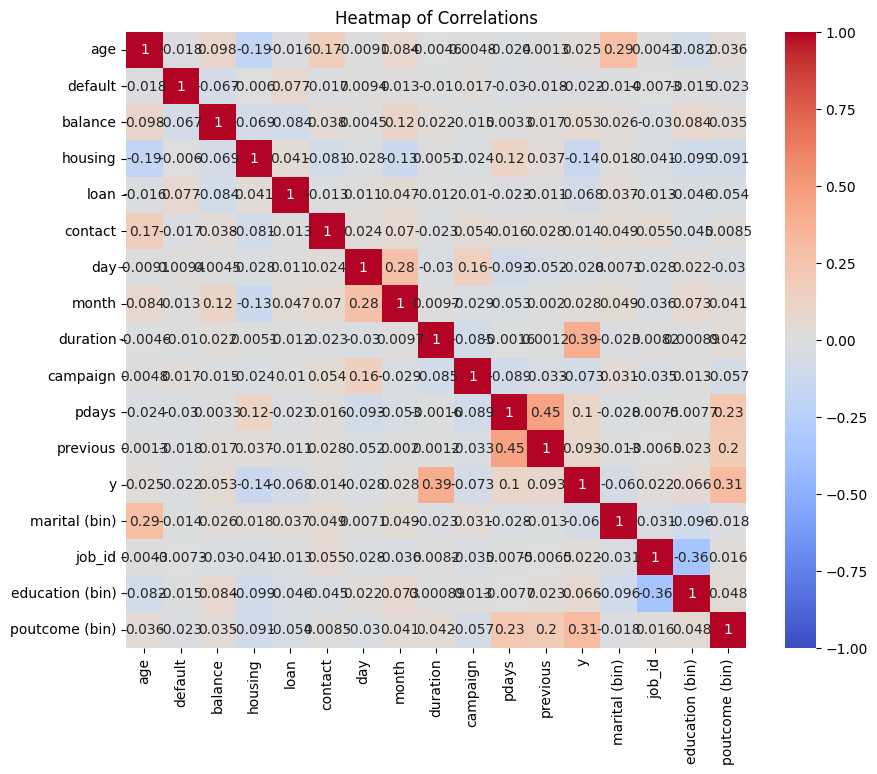

In [194]:
import seaborn as sb
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlations')
plt.show()

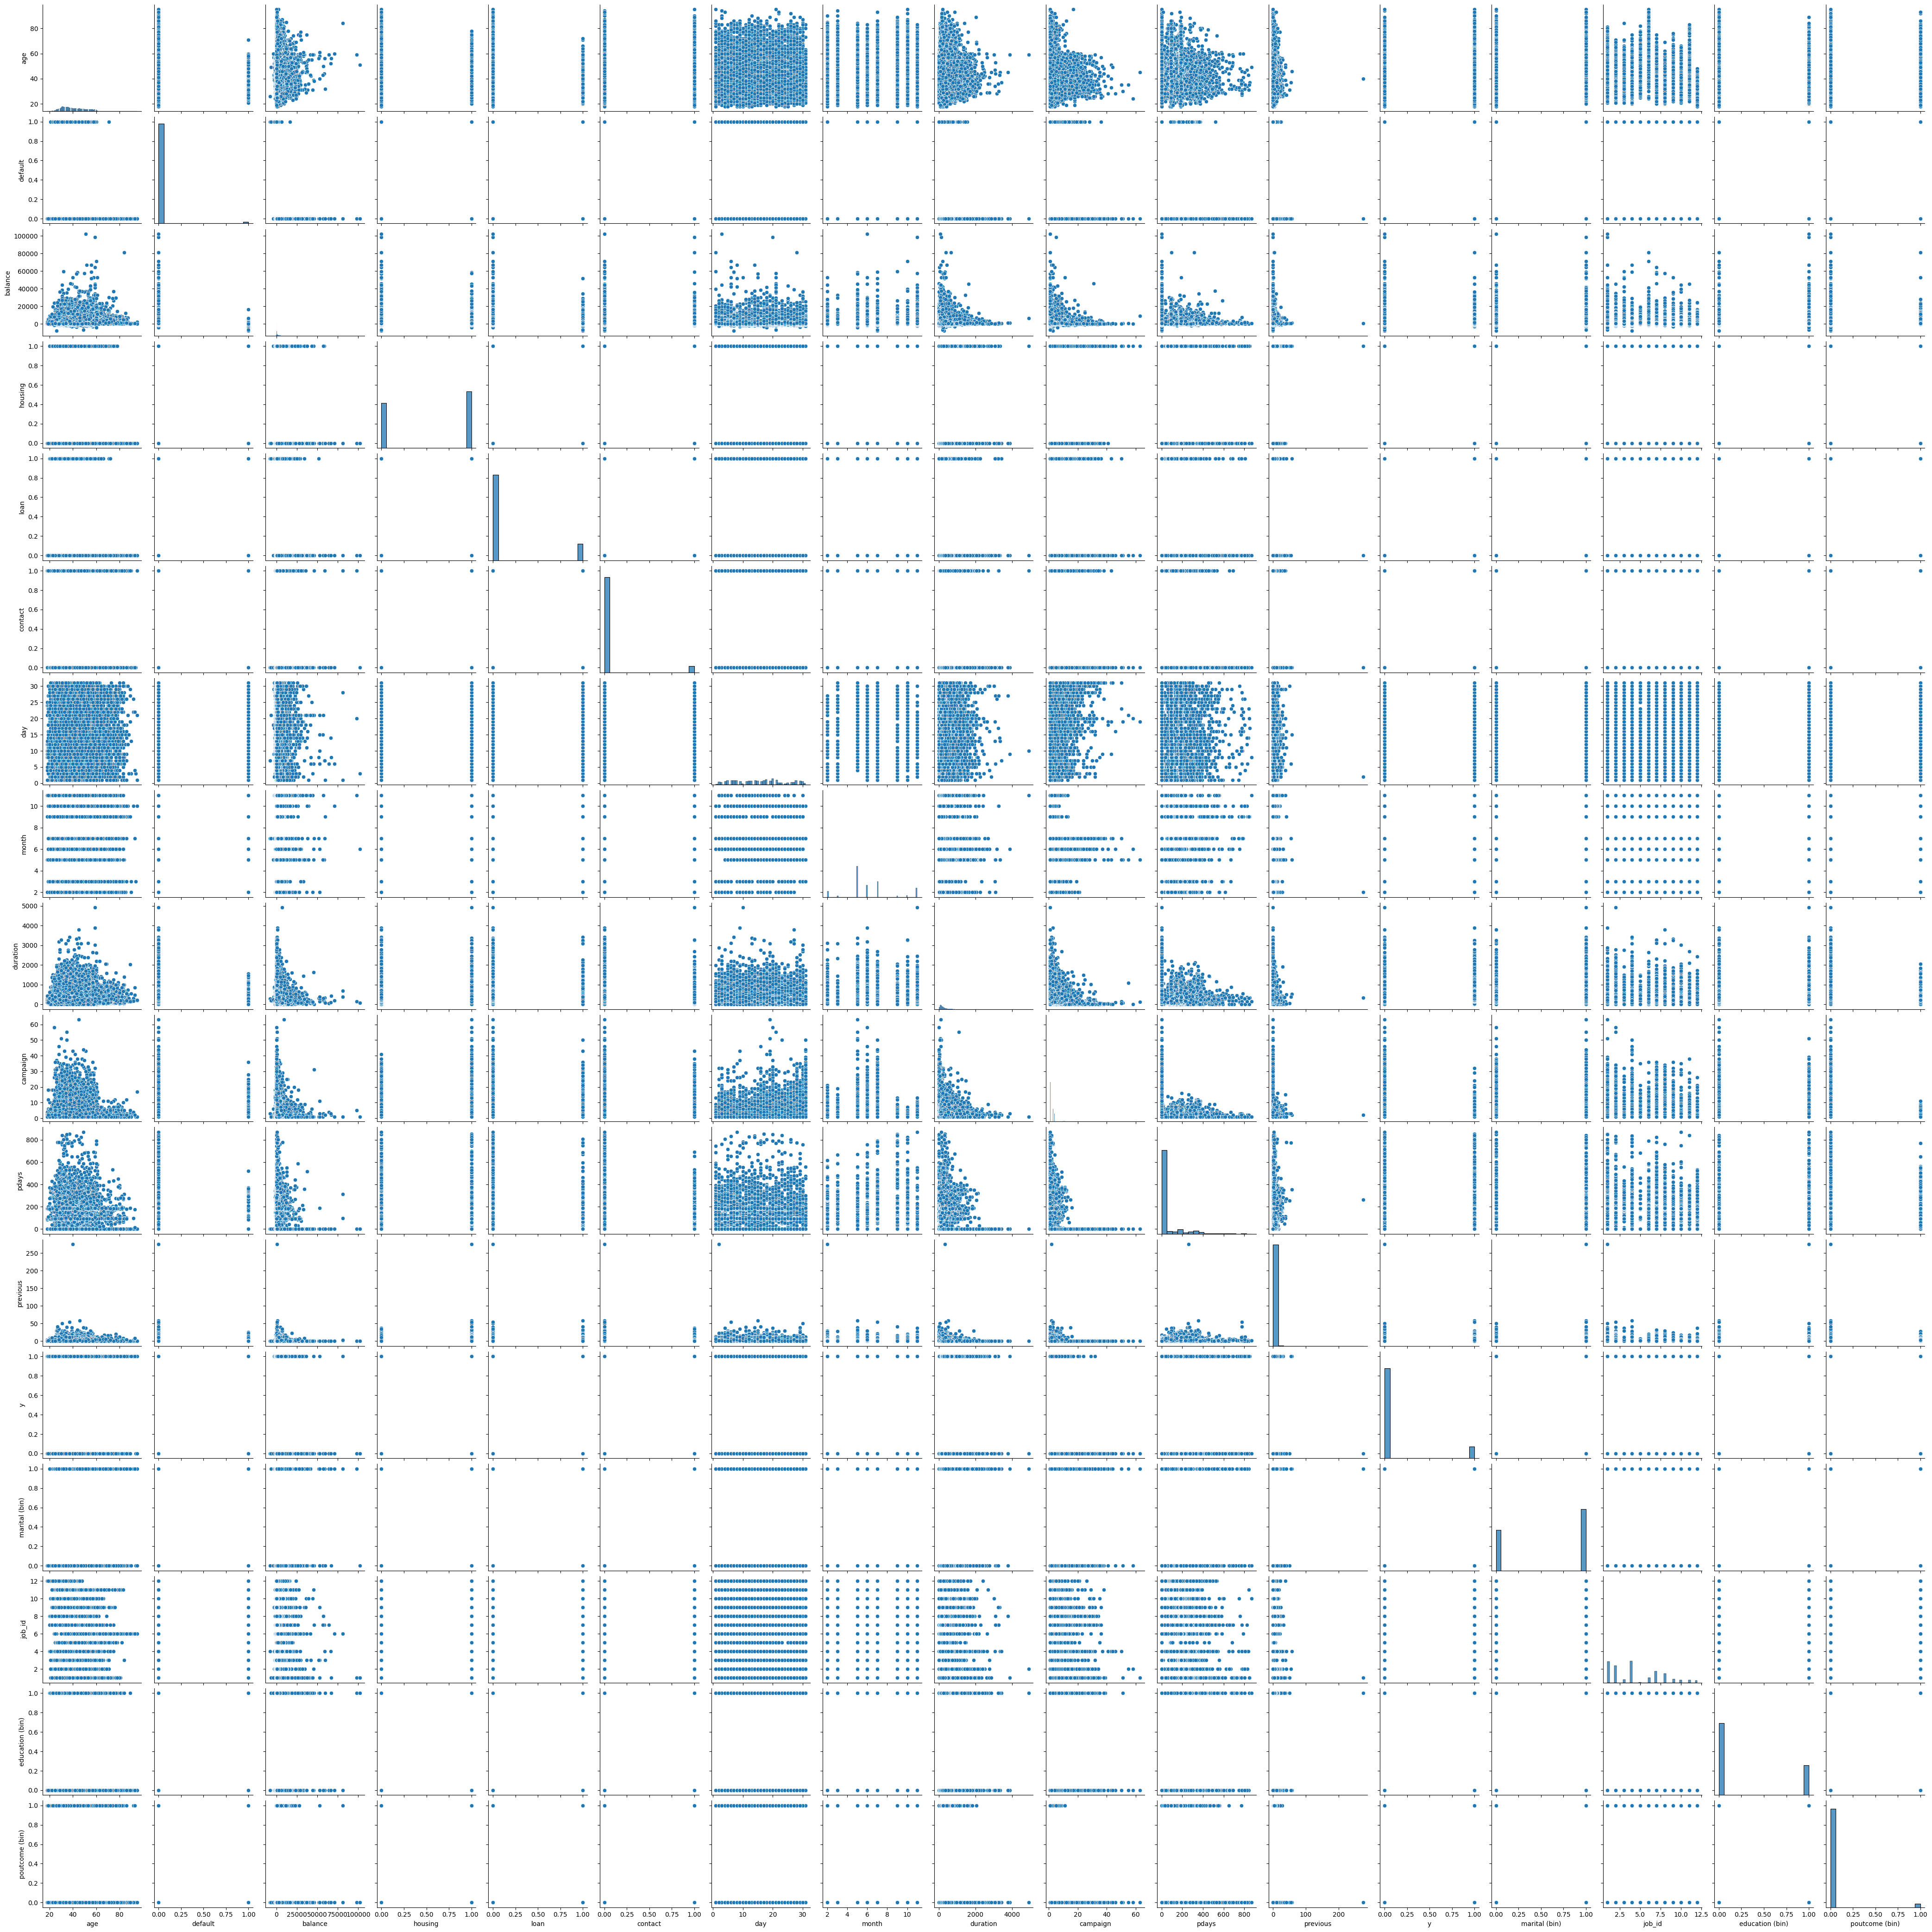

In [195]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

## Histograma para cada variable

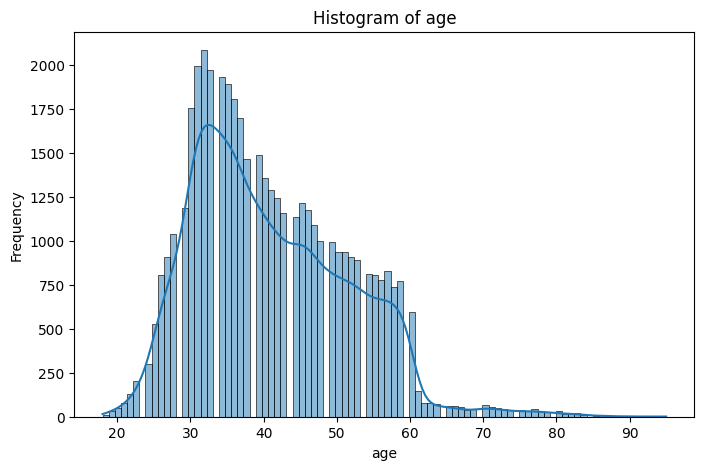

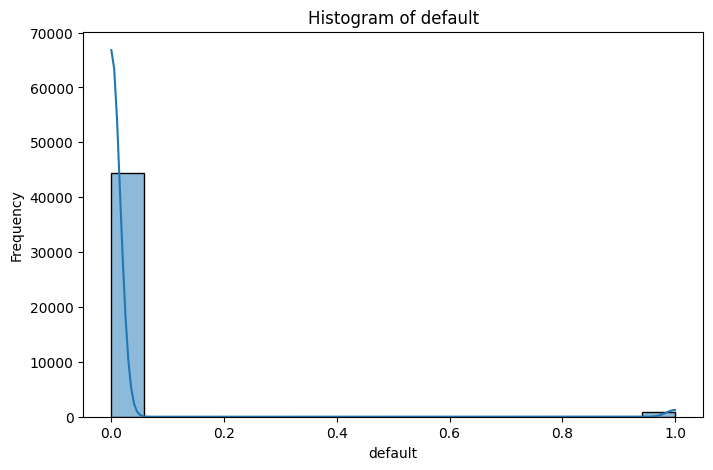

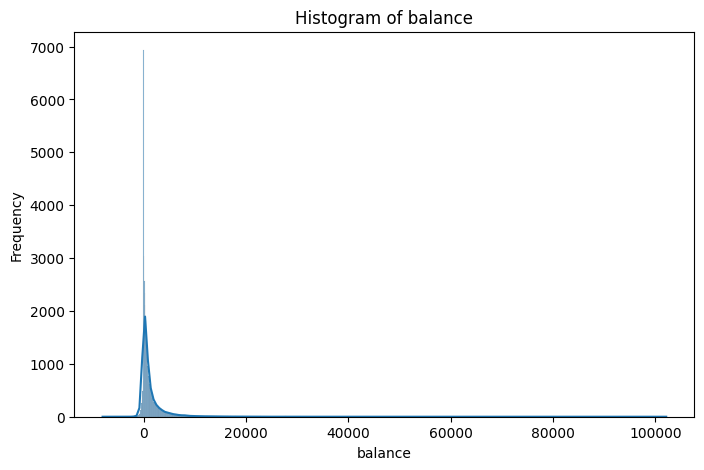

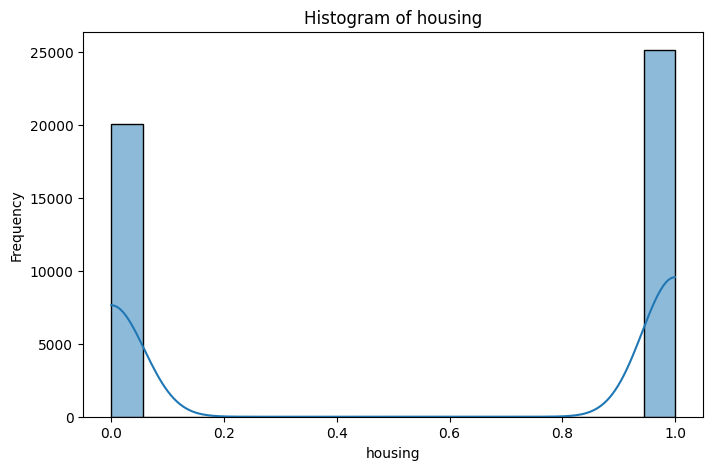

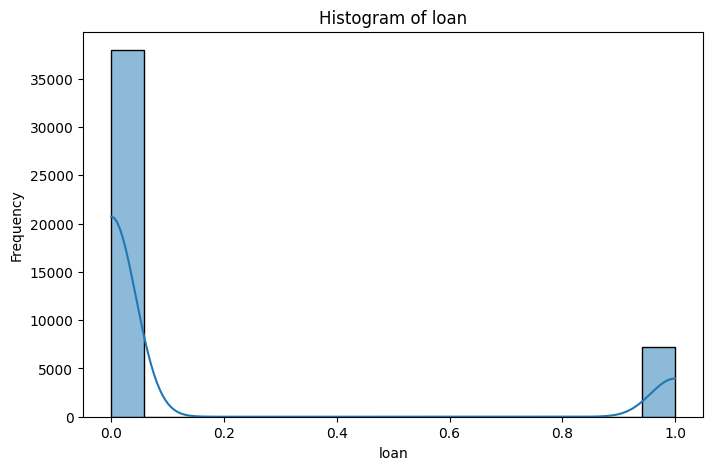

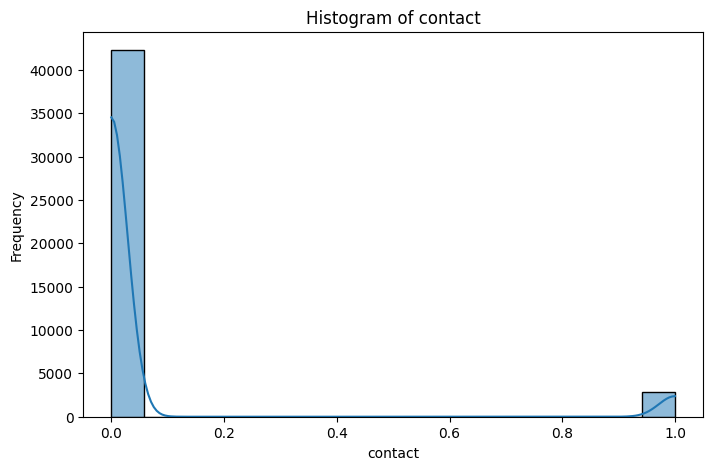

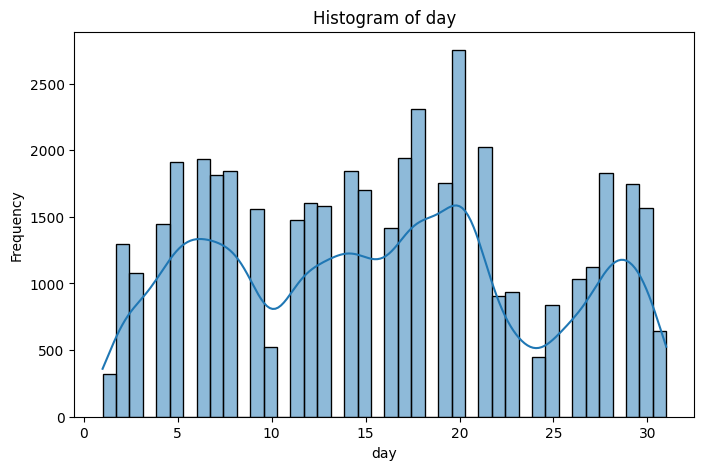

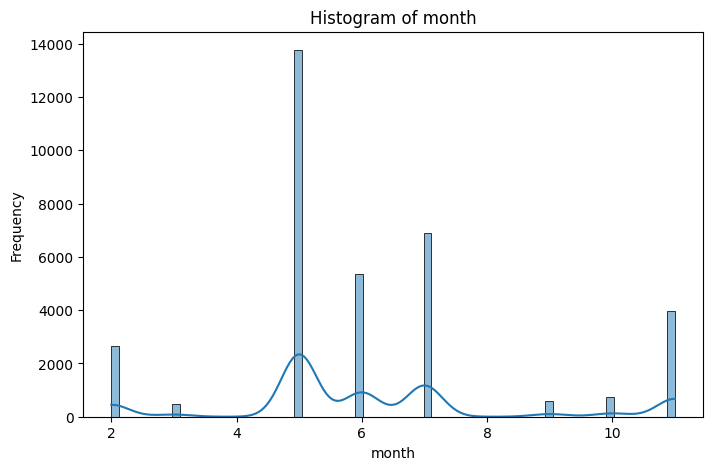

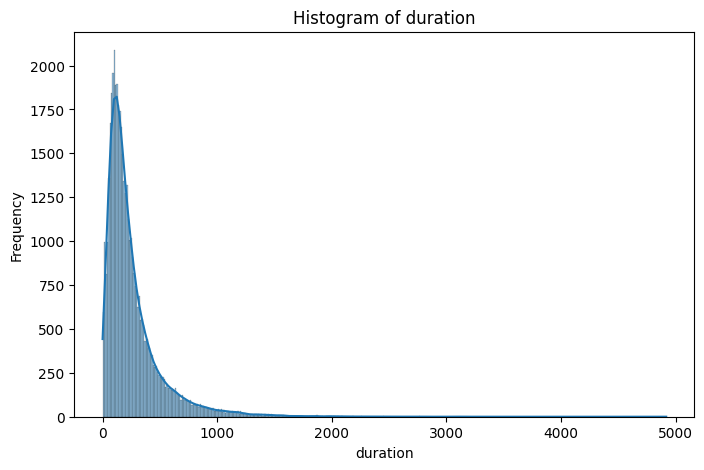

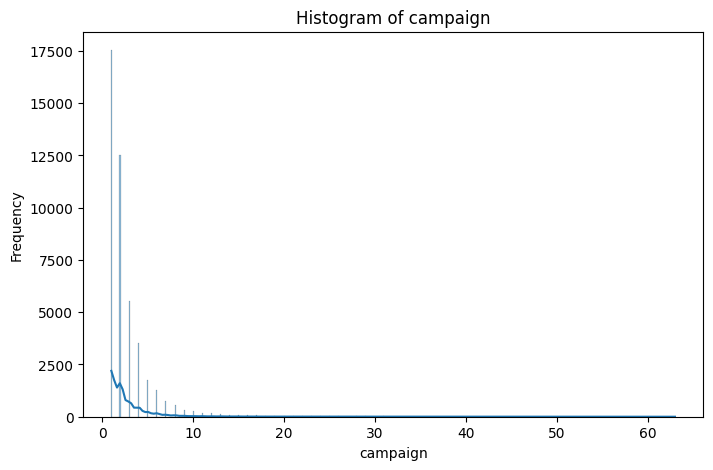

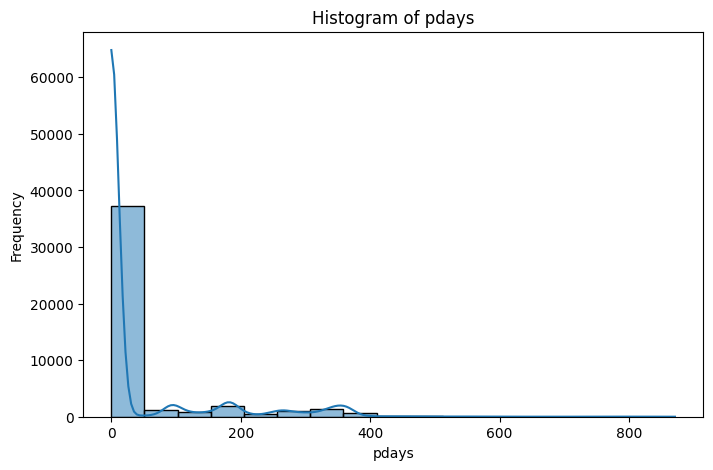

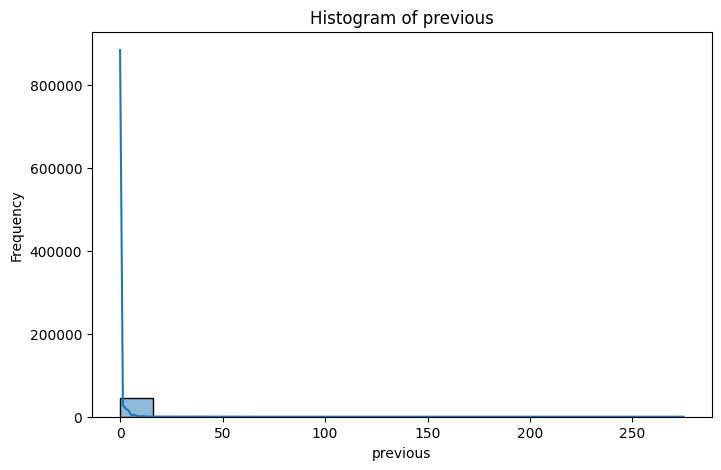

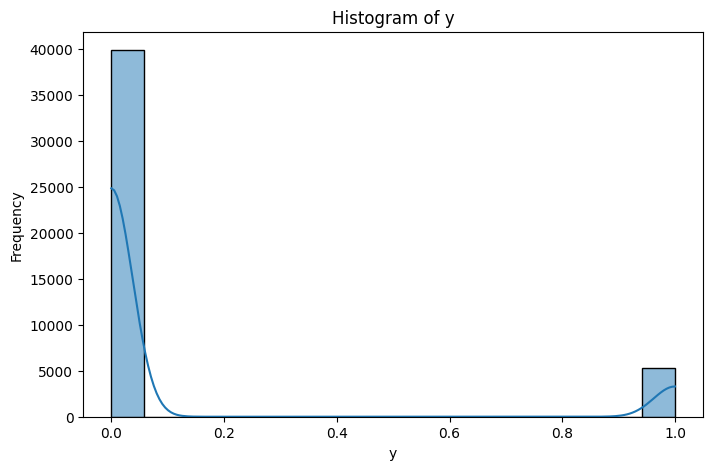

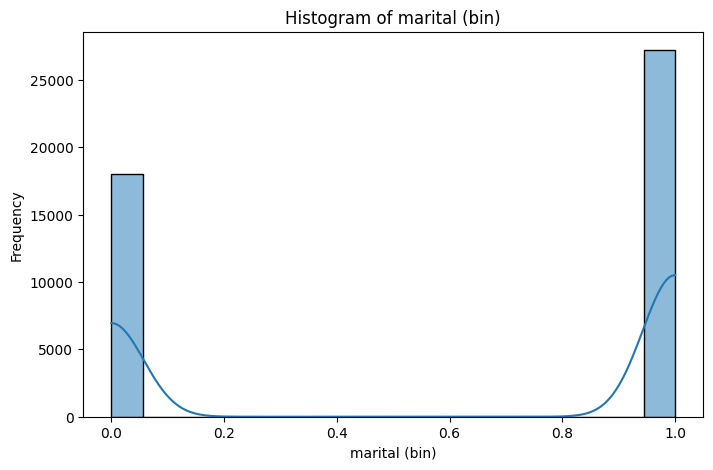

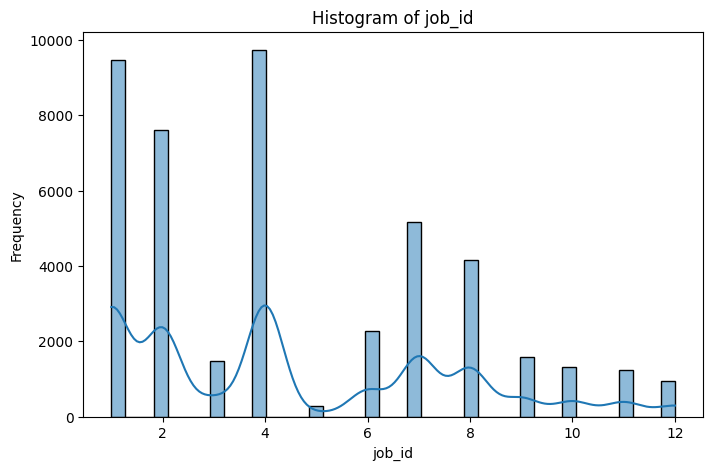

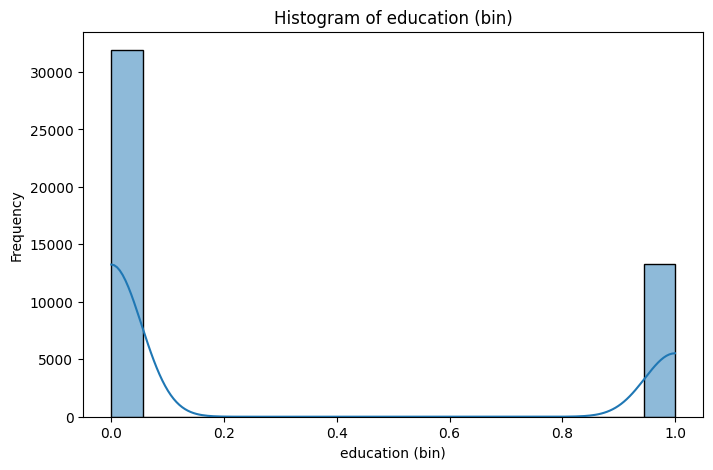

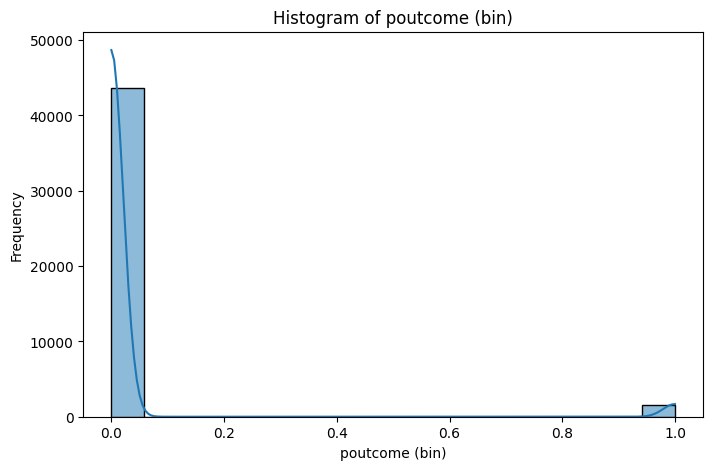

In [196]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Boxplots

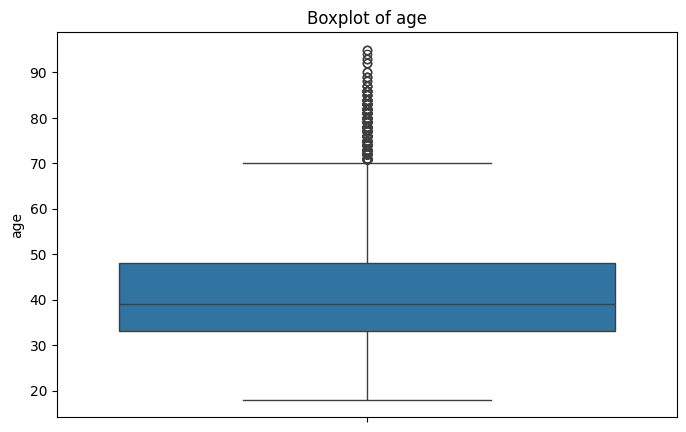

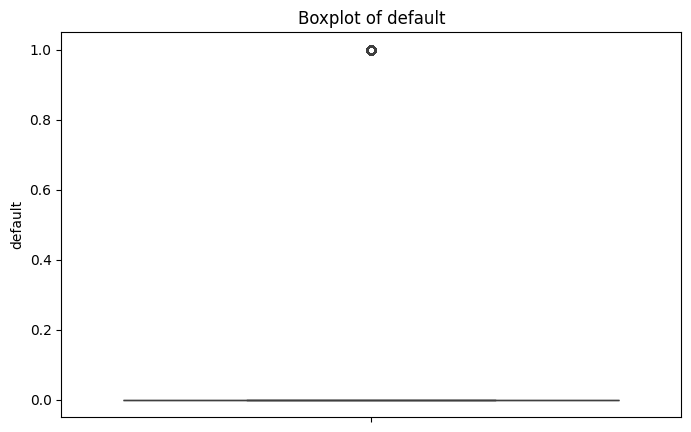

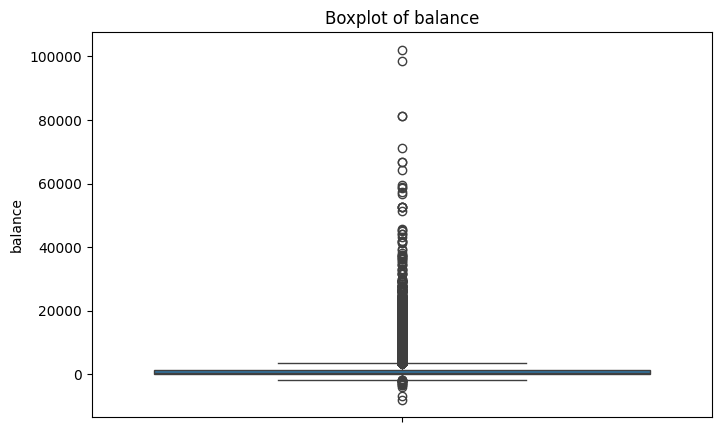

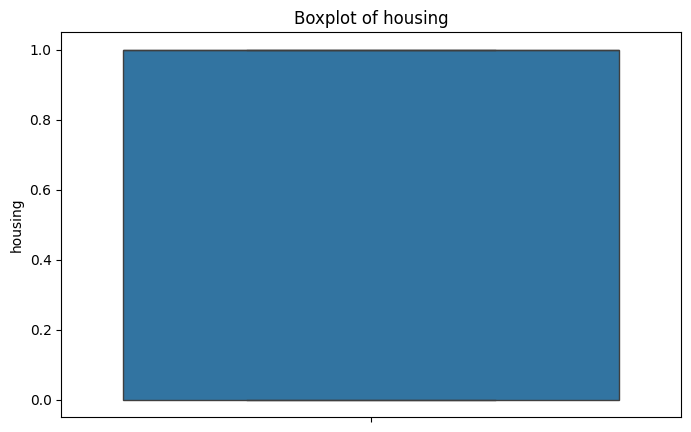

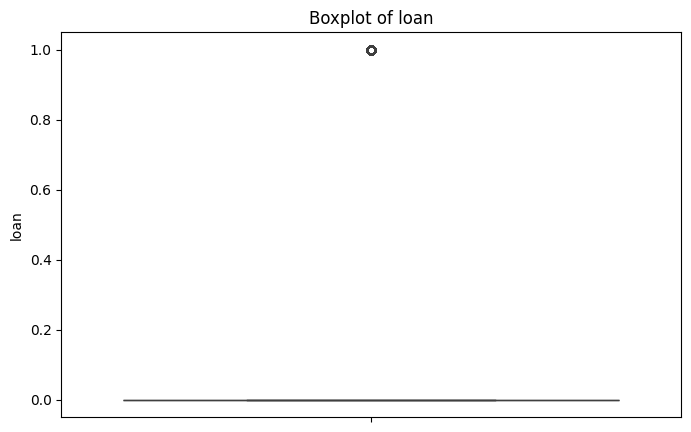

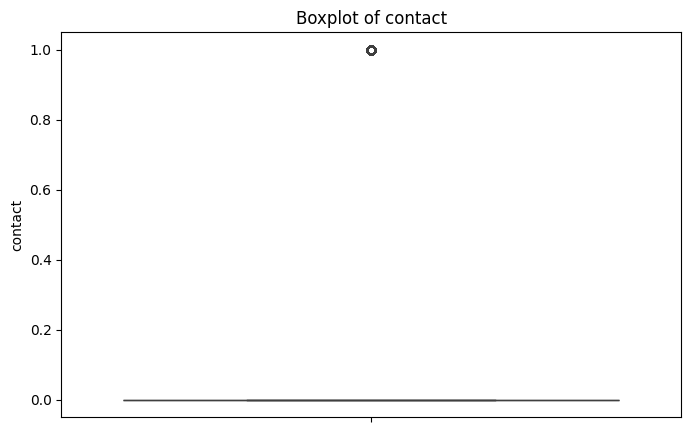

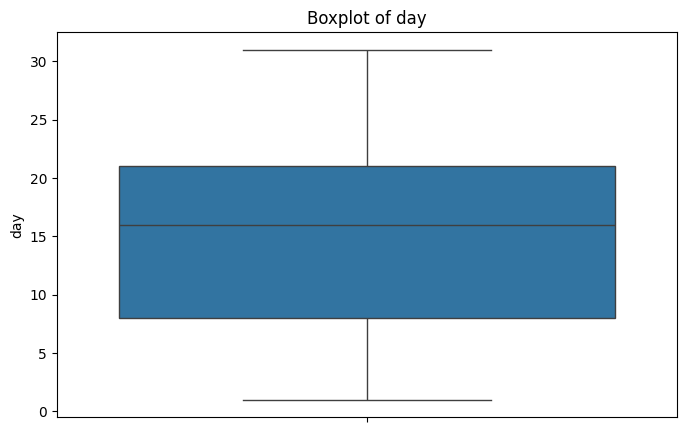

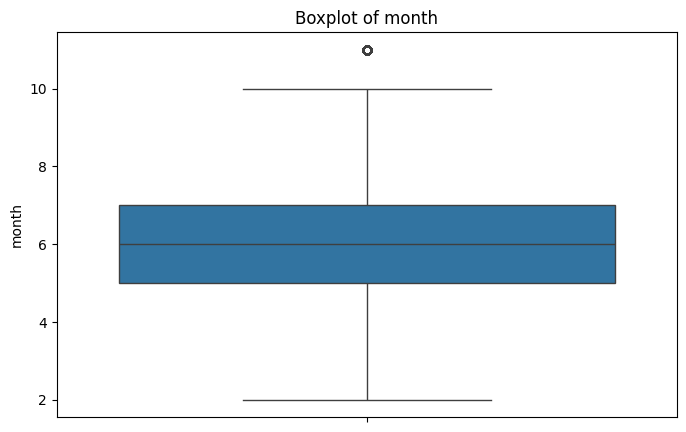

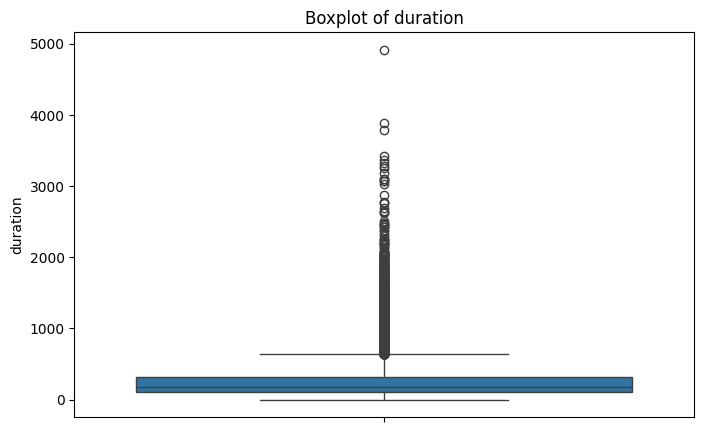

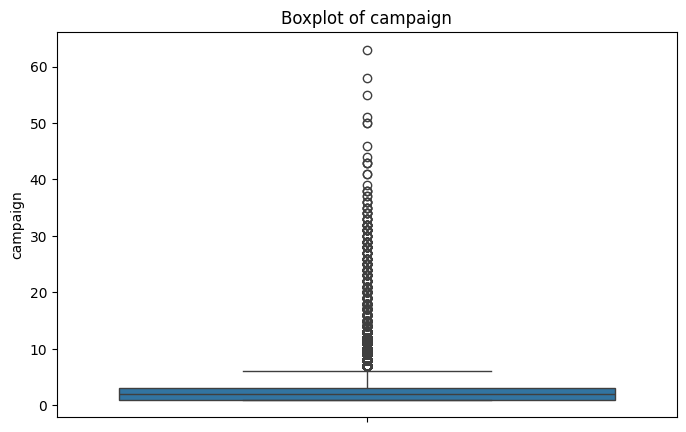

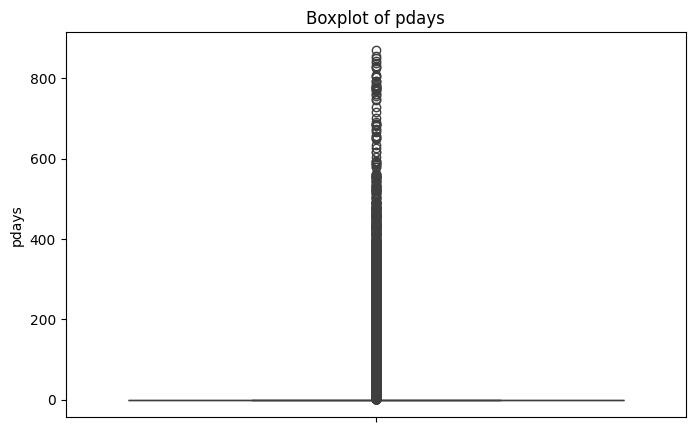

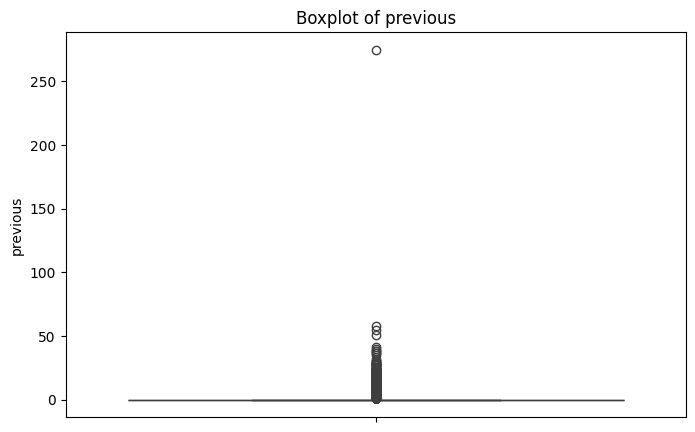

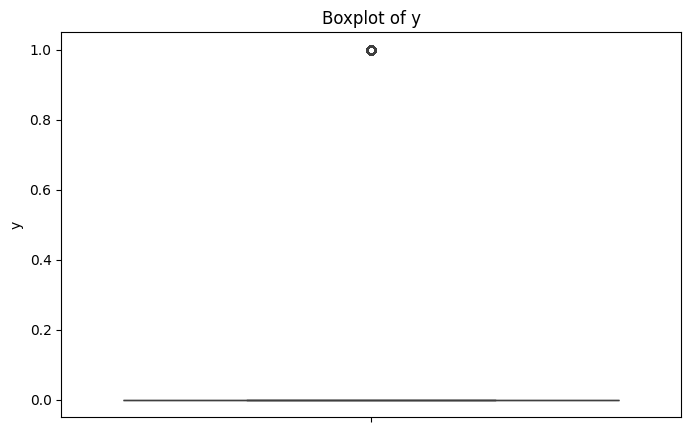

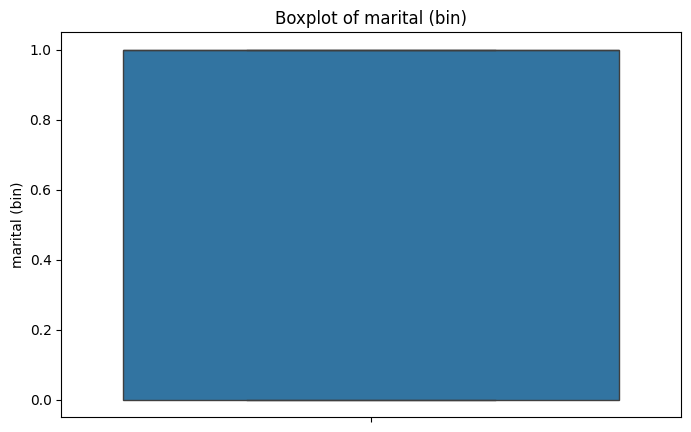

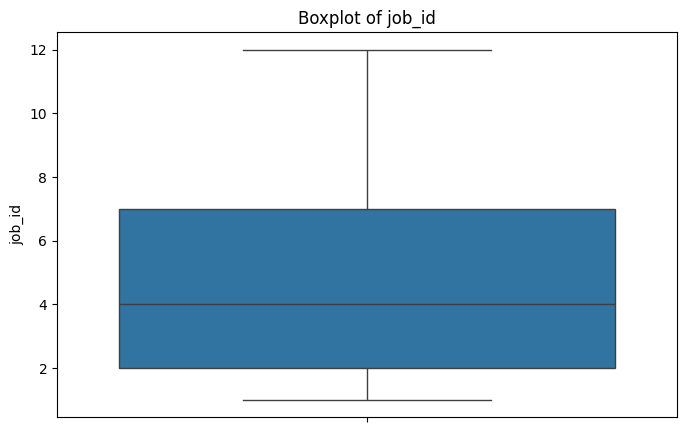

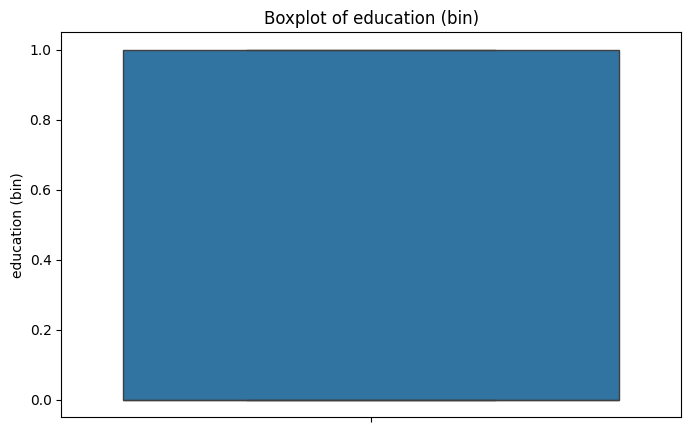

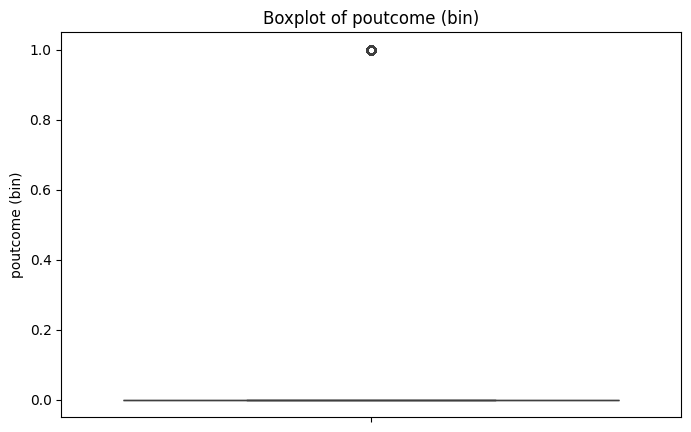

In [197]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

## Diagramas de dispersion

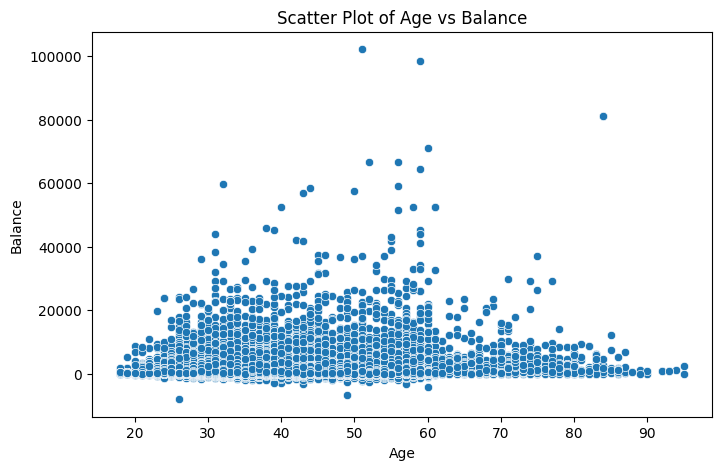

In [198]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='balance')
plt.title('Scatter Plot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

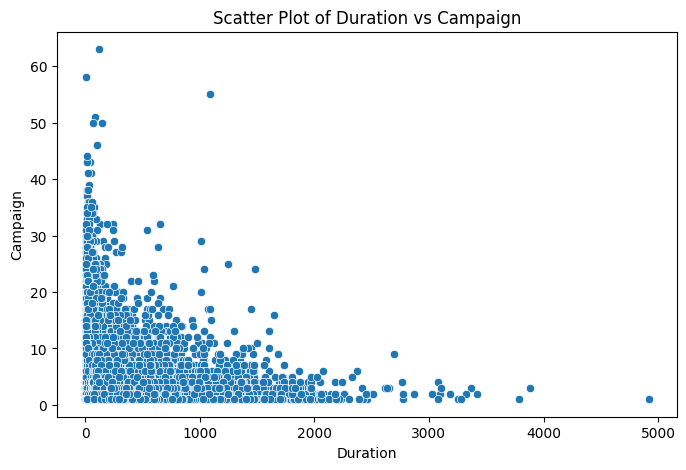

In [199]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='duration', y='campaign')
plt.title('Scatter Plot of Duration vs Campaign')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.show()

## Diagramas de violin

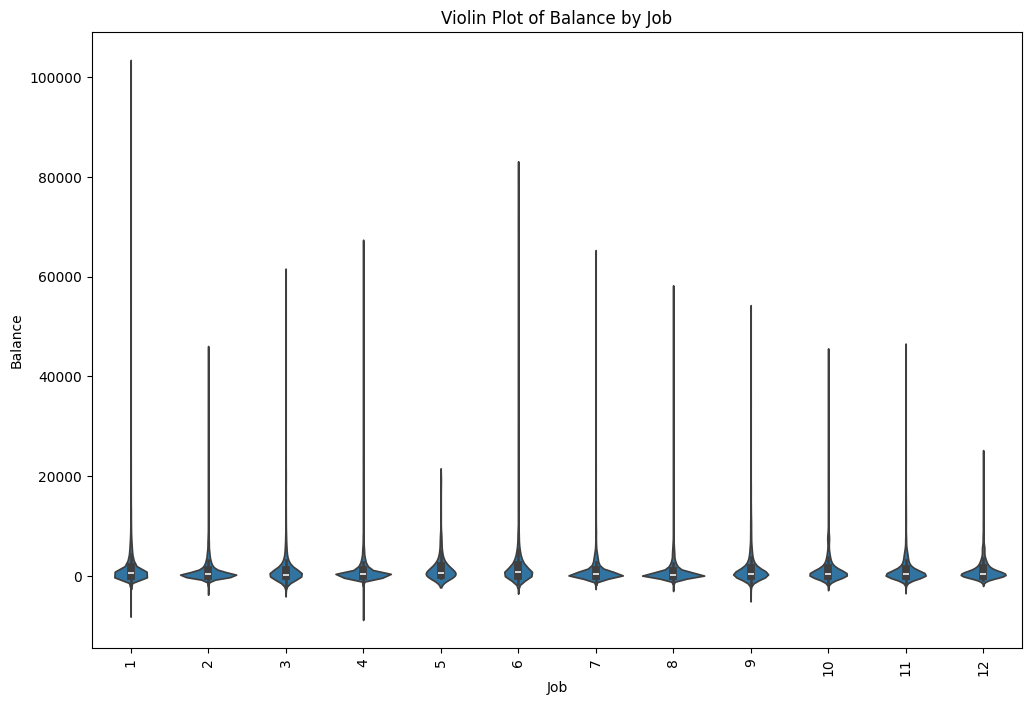

In [200]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='job_id', y='balance')
plt.xticks(rotation=90)
plt.title('Violin Plot of Balance by Job')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.show()

# Punto 4

In [201]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [202]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [203]:
features = ['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'marital (bin)', 'job_id', 'education (bin)', 'poutcome (bin)']
X=df[features]

In [204]:
Y=df['y']

In [205]:
types = df.dtypes.value_counts()
print(types)

int64      16
float64     1
Name: count, dtype: int64


In [206]:
# Reemplazar infinitos por NaN y eliminar cualquier valor faltante
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Verificar que no haya valores faltantes o infinitos en el DataFrame completo
print("Valores faltantes después de la limpieza:")
print(df.isnull().sum().sum())  # Debería ser 0 si no hay valores NaN
print("Valores infinitos después de la limpieza:")
print(np.isinf(df.values).sum())  # Debería ser 0 si no hay infinitos


Valores faltantes después de la limpieza:
0
Valores infinitos después de la limpieza:
0


In [207]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [208]:
# Eliminar filas con valores NaN
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Asegúrate de que y_train tenga los mismos índices

# Ajustar el modelo después de limpiar los datos
linreg.fit(X_train, y_train)

LinearRegression()

In [209]:


# Agregar constante explíticamente
X_train = sm.add_constant(X_train)

# Regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# Resumen de resultados
print(model.summary())

# Estadístico Durbin-Watson
dw_statistic = durbin_watson(model.resid)
print("\nEstadístico de Durbin-Watson:" + str(dw_statistic))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     593.1
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:06:46   Log-Likelihood:                -2730.7
No. Observations:               25862   AIC:                             5495.
Df Residuals:                   25845   BIC:                             5634.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0210      0.010     

In [210]:
features1 = ['balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'marital (bin)', 'job_id', 'education (bin)', 'poutcome (bin)']
X1=df[features1]
Y1 =df['y']

In [211]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)

X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((27532, 12), (6883, 12), (27532,), (6883,))

In [212]:
# Crear el modelo base
model_base = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Salida para regresión
])

# Compilar el modelo
model_base.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history_base = model_base.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

c:\Users\Juan David Auza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [213]:
model_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,133 (63.02 KB)

 Trainable params: 5,377 (21.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,756 (42.02 KB)

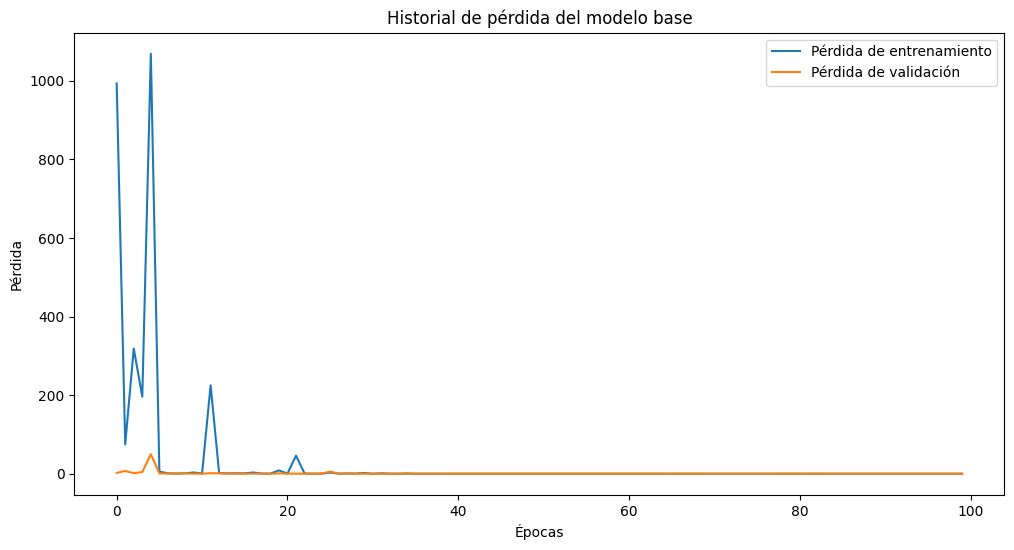

In [214]:
# Graficar historial
plt.figure(figsize=(12, 6))
plt.plot(history_base.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_base.history['val_loss'], label='Pérdida de validación')
plt.title('Historial de pérdida del modelo base')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [215]:
# Crear modelo con 32 neuronas (mitad del modelo base)
model32 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train1.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Salida para regresión
])

# Compilar el modelo
model32.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history32 = model32.fit(X_train1, y_train1, epochs=100, validation_split=0.2, verbose=0)

c:\Users\Juan David Auza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [216]:
# Crear modelo con 128 neuronas (doble del modelo base)
model128 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1)  # Salida para regresión
])

# Compilar el modelo
model128.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history128 = model128.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

c:\Users\Juan David Auza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


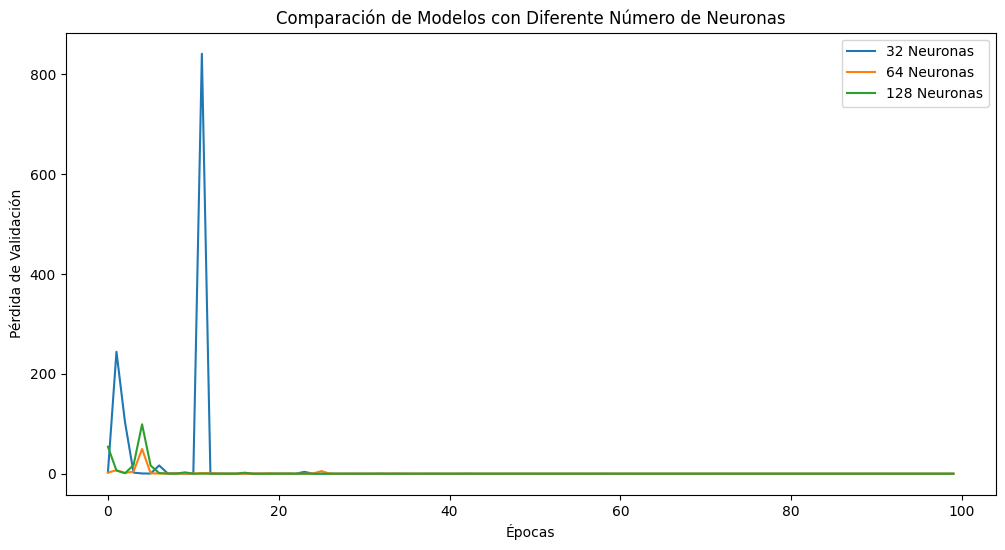

In [217]:
res = {32: history32, 64: history_base, 128: history128}
# Graficar resultados
plt.figure(figsize=(12, 6))
for n, history in res.items():
    plt.plot(history.history['val_loss'], label=f'{n} Neuronas')
plt.title('Comparación de Modelos con Diferente Número de Neuronas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida de Validación')
plt.legend()
plt.show()

### diferentes capas

In [239]:
# Función para crear y entrenar un modelo con una cantidad variable de capas ocultas
def crear_entrenar(layers_configuration):
    # Crear la red neuronal con la configuración de capas especificada
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train1.shape[1],)))
    
    # Añadir capas ocultas adicionales según la configuración dada
    for neurons in layers_configuration:
        model.add(Dense(neurons, activation='relu'))
    
    model.add(Dense(1))  # Capa de salida para regresión
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Entrenar el modelo
    history = model.fit(X_train1, y_train1, epochs=100, validation_split=0.2, verbose=1)
    
    # Evaluar el modelo
    loss, mae = model.evaluate(X_test1, y_test1)
    
    return history, loss, mae

In [240]:
configs = [
    [32],               # Configuración 1: 1 capa oculta
    [32, 64],           # Configuración 2: 2 capas ocultas
    [32, 64, 128]       # Configuración 3: 3 capas ocultas
]

In [241]:
# Diccionarios para almacenar los resultados de cada configuración
his = {}
losses = {}
maes = {}

In [242]:
# Entrenar y evaluar los modelos para cada configuración
for idx, config in enumerate(configs):
    print(f"\nEntrenando modelo con {len(config)} capas ocultas: {config} neuronas...")
    history, loss, mae = crear_entrenar(config)
    his[idx] = history
    losses[idx] = loss
    maes[idx] = mae


Entrenando modelo con 1 capas ocultas: [32] neuronas...
Epoch 1/100


c:\Users\Juan David Auza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9564.8848 - mae: 20.6144 - val_loss: 1.7284 - val_mae: 0.8454
Epoch 2/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9320 - mae: 0.8728 - val_loss: 0.8924 - val_mae: 0.6101
Epoch 3/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1038 - mae: 0.9069 - val_loss: 0.5745 - val_mae: 0.4846
Epoch 4/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5376 - mae: 0.6104 - val_loss: 1.0084 - val_mae: 0.5907
Epoch 5/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7412 - mae: 0.7048 - val_loss: 0.6709 - val_mae: 0.4772
Epoch 6/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9305 - mae: 0.5047 - val_loss: 1.7773 - val_mae: 0.7083
Epoch 7/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 210.5157 - mae: 1.5569 - val_loss: 7.0323 - val_mae: 1.7960
Epoch 8/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6907 - mae: 0.9255 - val_loss: 0.3607 - val_mae: 0.4152
Epoch 9/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

c:\Users\Juan David Auza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 888.3840 - mae: 8.6808 - val_loss: 4.0410 - val_mae: 1.2351
Epoch 2/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.4304 - mae: 0.8160 - val_loss: 0.7454 - val_mae: 0.5229
Epoch 3/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1126 - mae: 0.5607 - val_loss: 0.1941 - val_mae: 0.2792
Epoch 4/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.8299 - mae: 0.4780 - val_loss: 3.1743 - val_mae: 0.8757
Epoch 5/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.9339 - mae: 0.9087 - val_loss: 0.3038 - val_mae: 0.3444
Epoch 6/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2725 - mae: 0.2961 - val_loss: 0.1563 - val_mae: 0.2337
Epoch 7/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.5234 - mae: 1.1872 - val_loss: 0.4249 - val_mae: 0.3569
Epoch 8/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5314 - mae: 0.3079 - val_loss: 0.1475 - val_mae: 0.2463
Epoch 9/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

c:\Users\Juan David Auza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7267.2466 - mae: 10.7099 - val_loss: 0.4116 - val_mae: 0.3698
Epoch 2/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9000 - mae: 0.7855 - val_loss: 0.8952 - val_mae: 0.4914
Epoch 3/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4131 - mae: 0.3465 - val_loss: 0.1658 - val_mae: 0.2560
Epoch 4/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 172.0668 - mae: 2.3845 - val_loss: 0.1634 - val_mae: 0.2877
Epoch 5/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.5482 - mae: 0.8082 - val_loss: 0.4931 - val_mae: 0.4097
Epoch 6/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3301 - mae: 0.2835 - val_loss: 0.1160 - val_mae: 0.2110
Epoch 7/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2101 - mae: 0.3744 - val_loss: 0.1374 - val_mae: 0.2348
Epoch 8/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1758 - mae: 0.2442 - val_loss: 0.2317 - val_mae: 0.2629
Epoch 9/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

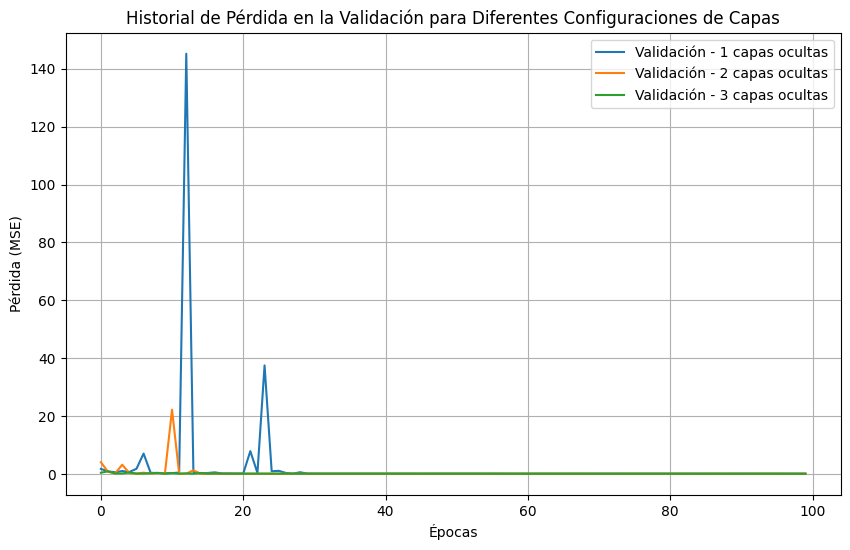

In [243]:
# Graficar la historia de la pérdida para cada configuración
plt.figure(figsize=(10,6))
for idx, config in enumerate(configs):
    plt.plot(his[idx].history['val_loss'], label=f'Validación - {len(config)} capas ocultas')
plt.title('Historial de Pérdida en la Validación para Diferentes Configuraciones de Capas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()

### Comparación con el modelo base

In [244]:
# Primer modelo
model1 = Sequential([
        Dense(32, activation='tanh', input_shape=(X_train.shape[1],)),
        Dense(64, activation='tanh'),
        Dense(1) 
    ])

# Compilación
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento
history1 = model1.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

c:\Users\Juan David Auza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [245]:
# Segundo modelo
model2 = Sequential([
        Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
        Dense(64, activation='tanh'),
        Dense(32, activation='tanh'),
        Dense(1)  
    ])

# Compilación
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento
history2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

c:\Users\Juan David Auza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


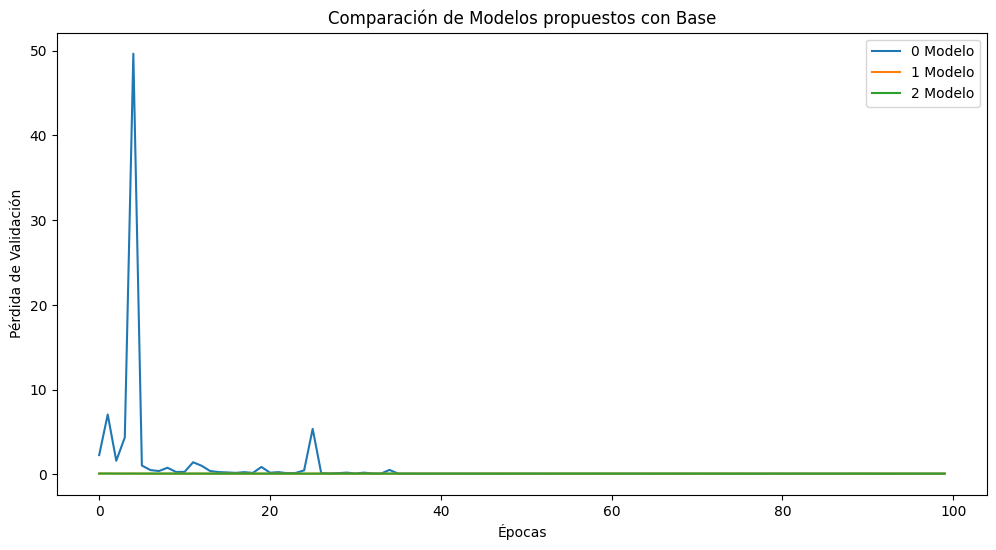

In [246]:
res = {0: history_base, 1: history1, 2: history2}
# Graficar resultados
plt.figure(figsize=(12, 6))
for n, history in res.items():
    plt.plot(history.history['val_loss'], label=f'{n} Modelo')
plt.title('Comparación de Modelos propuestos con Base')
plt.xlabel('Épocas')
plt.ylabel('Pérdida de Validación')
plt.legend()
plt.show()